In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


df = pd.read_csv('/Users/aliyasta/Downloads/datasets.csv')
df['REASON'] = df['REASON'].replace(['HomeImp', 'DebtCon'], [0, 1])
df['JOB'] = df['JOB'].replace(['Other', 'Sales', 'Office', 'Mgr', 'ProfExe', 'Self'], [0, 1, 2, 3, 4, 5])
missing_percentages = df.isnull().mean(axis=1) * 100
rows_to_drop = missing_percentages[missing_percentages >= 70].index
df = df.drop(rows_to_drop)
df['MORTDUE'] = np.log(df['MORTDUE'])
df['VALUE'] = np.log(df['VALUE'])
df['YOJ'] = np.log(df['YOJ']+1)
X = df.drop('BAD', axis=1)
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
imputer = SimpleImputer()
pipeline = make_pipeline(imputer, model)
pipeline.fit(X_train, y_train)
y_pred_proba = pipeline.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

from sklearn.pipeline import Pipeline
joblib.dump(pipeline, '/Users/aliyasta/pipeline_file.pkl')


Accuracy score: 0.9159663865546218


['/Users/aliyasta/pipeline_file.pkl']

Precision score: 0.8384279475982532
Recall score: 0.7470817120622568
F1 score: 0.7901234567901234
ROC AUC score: 0.9661336803166223
Mean Absolute Error: 0.08571428571428572
Accuracy score: 0.9142857142857143
Gini score: 0.9322673606332446


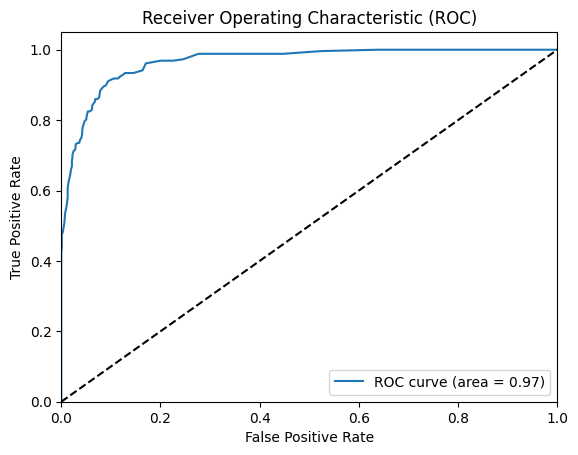

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
print("Precision score:", precision)

recall = recall_score(y_test, y_pred)
print("Recall score:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC AUC score:", roc_auc)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate Gini score
gini = 2 * roc_auc - 1
print("Gini score:", gini)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [10]:
from datetime import datetime, timedelta
import requests
import currencyapicom
client = currencyapicom.Client('qVc9LBFXf4ScZGLMR6YY3vxaQq03htsgFW4VFk5I')
from datetime import datetime, timedelta
day_before_yesterday = datetime.now() - timedelta(days=2)
day_before_yesterday_str = day_before_yesterday.strftime('%Y-%m-%d')
result1 = client.historical(day_before_yesterday_str)
data1=result1['data']['EUR']['value']
yesterday = datetime.now() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%d')
result2 = client.historical(yesterday_str)
data2=result1['data']['EUR']['value']
if data2-data1>0:
    itog='доллар укрепляется'
else:
    itog='доллар не укрепляется'

y_pred = []
for i in y_pred_proba:
    if itog == 'доллар укрепляется' and i[1] < 0.55:
        y_pred.append(0)
    elif itog == 'доллар не укрепляется' and i[1] < 0.45:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9142857142857143
